In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
df =  pd.read_csv("medical_clean.csv")

df.head()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


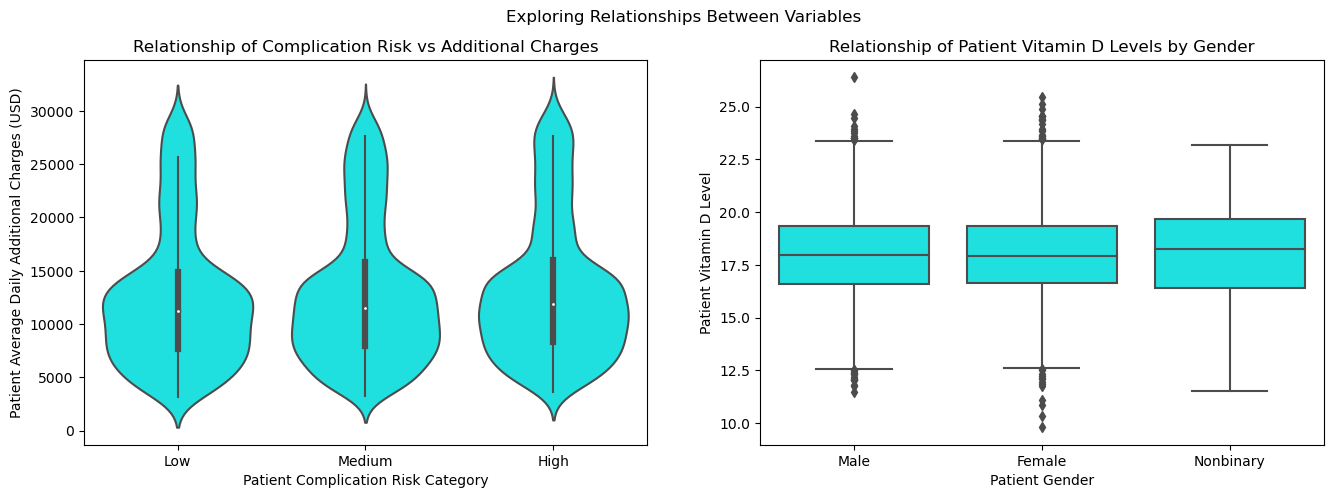

In [3]:

# Create a figure with a size of 16x5 for bivariate exploration
plt.figure(figsize=[16, 5])
# Add a super title for the entire figure
plt.suptitle("Exploring Relationships Between Variables")
# Plot on the left: Bivariate exploration of Complication_risk and Additional_charges
plt.subplot(1, 2, 1)  # Create a subplot, 1 row, 2 columns, and plot 1
plt.title('Relationship of Complication Risk vs Additional Charges')  # Title for the subplot
plot_order = ["Low", "Medium", "High"]  # Define order for x-axis categories
sns.violinplot(data=df, x="Complication_risk", y="Additional_charges", color="cyan", order=plot_order)  # Create violin plot
plt.xlabel('Patient Complication Risk Category')  # Label for x-axis
plt.ylabel("Patient Average Daily Additional Charges (USD)")  # Label for y-axis
# Plot on the right: Bivariate exploration of Gender and VitD_levels
plt.subplot(1, 2, 2)  # Create a subplot, 1 row, 2 columns, and plot 2
plt.title("Relationship of Patient Vitamin D Levels by Gender")  # Title for the subplot
sns.boxplot(data=df, x="Gender", y="VitD_levels", color="cyan")  # Create box plot
plt.xlabel("Patient Gender")  # Label for x-axis
plt.ylabel("Patient Vitamin D Level")  # Label for y-axis

plt.show()  # Display the plots


In [4]:
# Calculate correlation between VitD_levels and Additional_charges
correlation = df['VitD_levels'].corr(df['Additional_charges'])
print("Correlation between VitD_levels and Additional_charges:", correlation)


Correlation between VitD_levels and Additional_charges: 0.008289992581332683


In [5]:

# Define the bins for categorizing Additional_charges
bins = [3125.703, 7986.487755, 11573.977735, 15626.490000, 30566.070000]
labels = ['Low', 'Medium', 'High', 'Very High']


In [6]:

# Categorize Additional_charges
df['Additional_charges_category'] = pd.cut(df['Additional_charges'], bins=bins, labels=labels)

# Create the contingency table
contingency_table = pd.crosstab(df['Complication_risk'], df['Additional_charges_category'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Additional_charges_category   Low  Medium  High  Very High
Complication_risk                                         
High                          759     845   886        868
Low                           588     516   534        486
Medium                       1152    1139  1080       1146


In [7]:

# Print the chi-square test results with clarification
print("\nChi-Square Test Results (for association between Complication_risk and Additional_charges_category):")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")



Chi-Square Test Results (for association between Complication_risk and Additional_charges_category):
Chi-square value: 24.61312982182842
P-value: 0.0004026007048223903


In [8]:

# Calculate mean Vitamin D levels for each gender group
mean_vitD_female = df[df['Gender'] == 'Female']['VitD_levels'].mean()
mean_vitD_male = df[df['Gender'] == 'Male']['VitD_levels'].mean()
mean_vitD_nonbinary = df[df['Gender'] == 'Nonbinary']['VitD_levels'].mean()

print("\nMean Vitamin D levels for Female:", mean_vitD_female)
print("Mean Vitamin D levels for Male:", mean_vitD_male)
print("Mean Vitamin D levels for Nonbinary:", mean_vitD_nonbinary)

# Additional comments to clarify interpretations
print("\nBivariate Stats Interpretation:")
print("1. Correlation between VitD_levels and Additional_charges indicates the strength and direction of their relationship.")
print("2. Chi-Square Test Results assess the association between Complication_risk and Additional_charges_category.")
print("3. Mean Vitamin D levels are compared across gender groups.")




Mean Vitamin D levels for Female: 17.98585338779992
Mean Vitamin D levels for Male: 17.936360199517615
Mean Vitamin D levels for Nonbinary: 18.07962064182243

Bivariate Stats Interpretation:
1. Correlation between VitD_levels and Additional_charges indicates the strength and direction of their relationship.
2. Chi-Square Test Results assess the association between Complication_risk and Additional_charges_category.
3. Mean Vitamin D levels are compared across gender groups.
